<h4 align="center">Jian Sun</h4>
<h4 align="center">DUID: 873397832</h4>

# CONTENT
- Introduction
- Data Exploration
- Model
- Conclusion
- Appendix

# Introduction
In image processing, histogram matching is the transformation of an image so that its histogram matches a specified histogram, it is widely utilized in image enhancement. The well-known histogram equalization method is a special case in which the specified histogram is uniformly distributed. It can enhance the contrast and quality of images.
The objective of this project is to implement the idea of histogram matching. In Matlab, we code and implement histogram equalization to source, target and self-taking images, then evaluate the equalization effect with the Matlab built-in imhistmatch() function. Finally, the conclusion is drawn based on comprehensive analysis.

# Data Exploration
The selected dataset are divided into 3 groups, source images(circuit.tif and forest.tif), target images(leaf.tif and man.tif) and self-taking images(bright one and dark one). Each group should be grayscale during processing.

The size of each image is:

|Name           |Row    |Column |Layer  |Bit
|:--------------|:-----:|:-----:|:-----:|-----:
|circuit.tif    |280    |272    |1      |8  
|forest.tif     |301    |447    |1      |8 
|leaf.tif       |600    |400    |1      |8  
|man.tif        |683    |1024   |3      |24  
|selfbright.jpg |363    |600    |3      |24
|selfdark.png   |1080   |1440   |3      |24


The first three images are in gray scale, they need not to be dealed before processing. The fourth one is in gray scale too, but it has 3 layer and it is 24 bit image. It will be shrink to one layer and converted 8 bit. So do the last two color images. 


# Model

## Histogram Equalization 
The histogram of a digital image with gray levels in the range $[ 0, L-1]$ is a discrete function $h(r_{k})=n_{k}$, where $r_{k}$ is the kth gray level and $n_{k}$ is the number of pixels in the image having gray level $r_{k}$. It is common practice to normalize a histogram by dividing each of its values by the total number of pixels in the image, denote by $M\times N$. M is row number, N is column number. Thus, a normalized histogram is given by $p(r_{k})=\frac{n_{k}}{M\times N}$, for k=0, 1,..., L-1. $p_{r_{k}}$ gives an estimate of the probability of occurrence of gray level $r_{k}$. The sum of all components of a normalized histogram is equal to 1.  
For any r satisfying the aforementioned conditions, we focus attention on transformations of the form  
$$s=T(r)\ \ \ \ 0\leq r\leq 1$$  
that produce a levels for every pixel value r in the original image.  
Let $p_{r}(r) and p_s(s)$ denote the probability density functions(PDF) of random variables r and s. For discrete condition, we deal with probability and summations instead of PDF and integrals. The discrete version of the transformation function is $s_{k}=T(r_{k})=(L-1)\sum_{j=0}^k p_{r}(r_{j})=(L-1)\sum_{j=0}^k \frac{n_{j}}{M\times N}\ \ \ \ k=0,1,2,...,L-1$. The transformation given in this equation is call __*histogram equalization*__ or __*histogram linearization*__.  
The inverse transformation from s back to r is denoted by $r_{k}=T^{-1}(s_{k})\ \ \ \ k=0,1,2,...,L-1$

## Histogram Matching
Histogram equalization automatically determines a transformation function that seeks to produce an output image that has a uniform histogram. It is useful sometimes to be able to specify the shape of the histogram that we with the processed image to have. The method used to generate a processed image that has a specified histogram is called __*histogram matching*__ or __*histogram specification*__.
The process is $s_{k}=T(r_{k})=(L-1)\sum_{j=0}^k p_{r}(r_{j})=\frac{L-1}{M\times N}\sum_{j=0}^k n_{j}\ \ \ \ k=0,1,2,...,L-1$  
$v_{k}=G(z_{k})=(L-1)\sum_{i=0}^k p_{z}(z_{i})=\frac{L-1}{M\times N}\sum_{i=0}^k n_{i}=s_{k}\ \ \ \ k=0,1,2,...,L-1$  
$z_{k}=G^{-1}[T(r_{k})]=G^{-1}(s_{k})=G^{-1}(T(r_{k}))$

## Evaluation
We will use Matlab to code histogram equalization, which consisting of 4 function, image_info.m(transfering image to gray level, extracting image size, bit number), probability.m(counting the number of each intensity value and calculating PDF), cumulative.m(calculating CDF and transformed value) and Hist_Eq.m(forming new image based on transformed value and converting the float64 to uint8 and limiting the intensity value between 0 and 255).  
Then we start doing histogram matching via imhistmatch() function.  
Finally, we use Plot.m to plot the equalized images, their histograms and matched images out.

# Conclusion

## circuit.tif

(<matplotlib.axes._subplots.AxesSubplot at 0x10b851b38>,
 <matplotlib.image.AxesImage at 0x12dec4f28>)

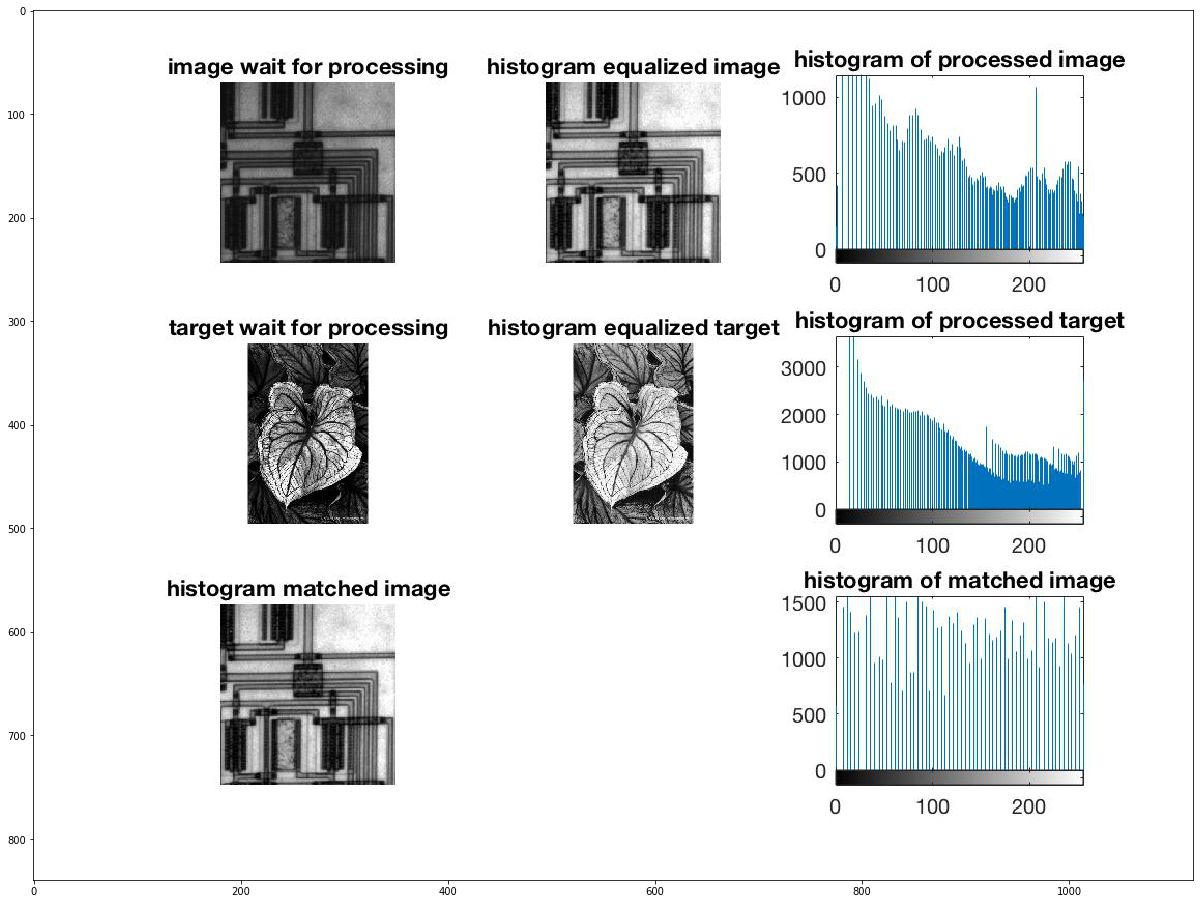

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 
def BGR2RGB(Input):
   output = np.zeros(Input.shape);
   output[:,:,0] = Input[:,:,2] 
   output[:,:,1] = Input[:,:,1] 
   output[:,:,2] = Input[:,:,0]
   output = output.astype('uint8')
   return output
plot1 = cv2.imread('./Plot/plot1.jpg')
plt.figure(figsize=(25,16))
plt.subplot(111),plt.imshow(BGR2RGB(plot1))

## forest.tif 

(<matplotlib.axes._subplots.AxesSubplot at 0x12def8f98>,
 <matplotlib.image.AxesImage at 0x12f65bac8>)

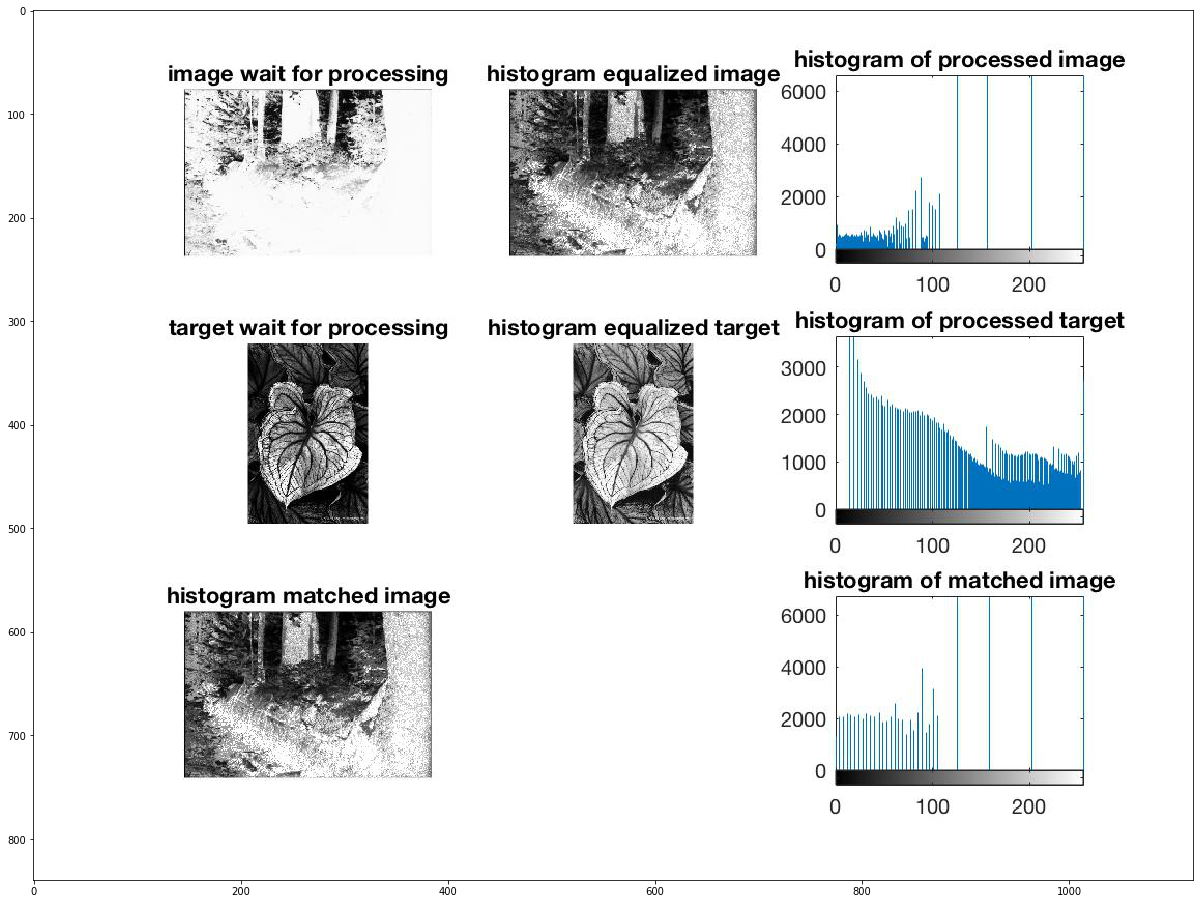

In [6]:
plot2 = cv2.imread('./Plot/plot2.jpg')
plt.figure(figsize=(25,16))
plt.subplot(111),plt.imshow(BGR2RGB(plot2))

## self taking bright image 

(<matplotlib.axes._subplots.AxesSubplot at 0x10ad43ef0>,
 <matplotlib.image.AxesImage at 0x10ad72630>)

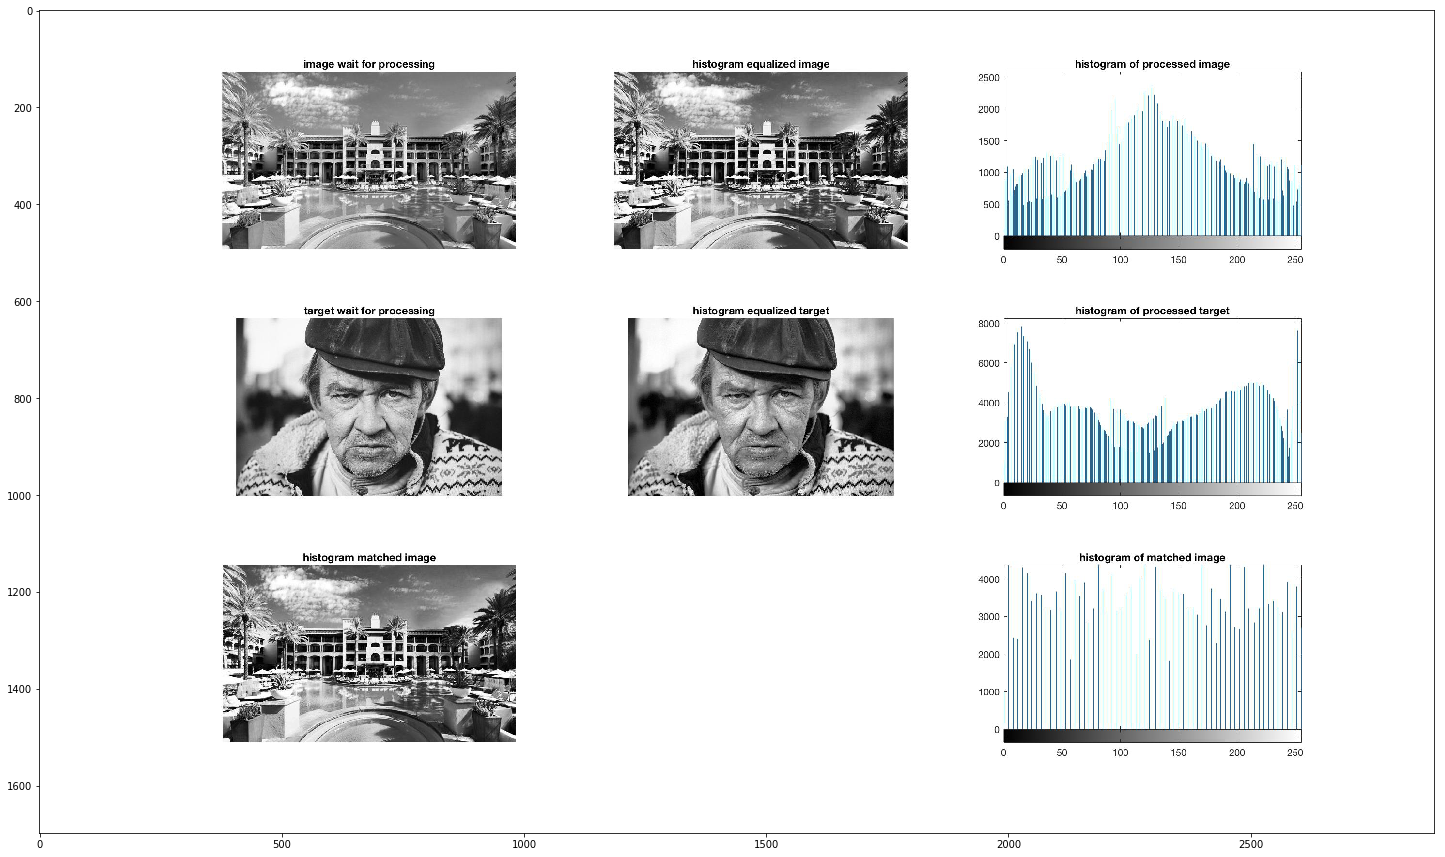

In [7]:
plot3 = cv2.imread('./Plot/plot3_bright2.jpg')
plt.figure(figsize=(25,16))
plt.subplot(111),plt.imshow(BGR2RGB(plot3))

## self taking dark image 

(<matplotlib.axes._subplots.AxesSubplot at 0x10ad9e4a8>,
 <matplotlib.image.AxesImage at 0x10ae36c88>)

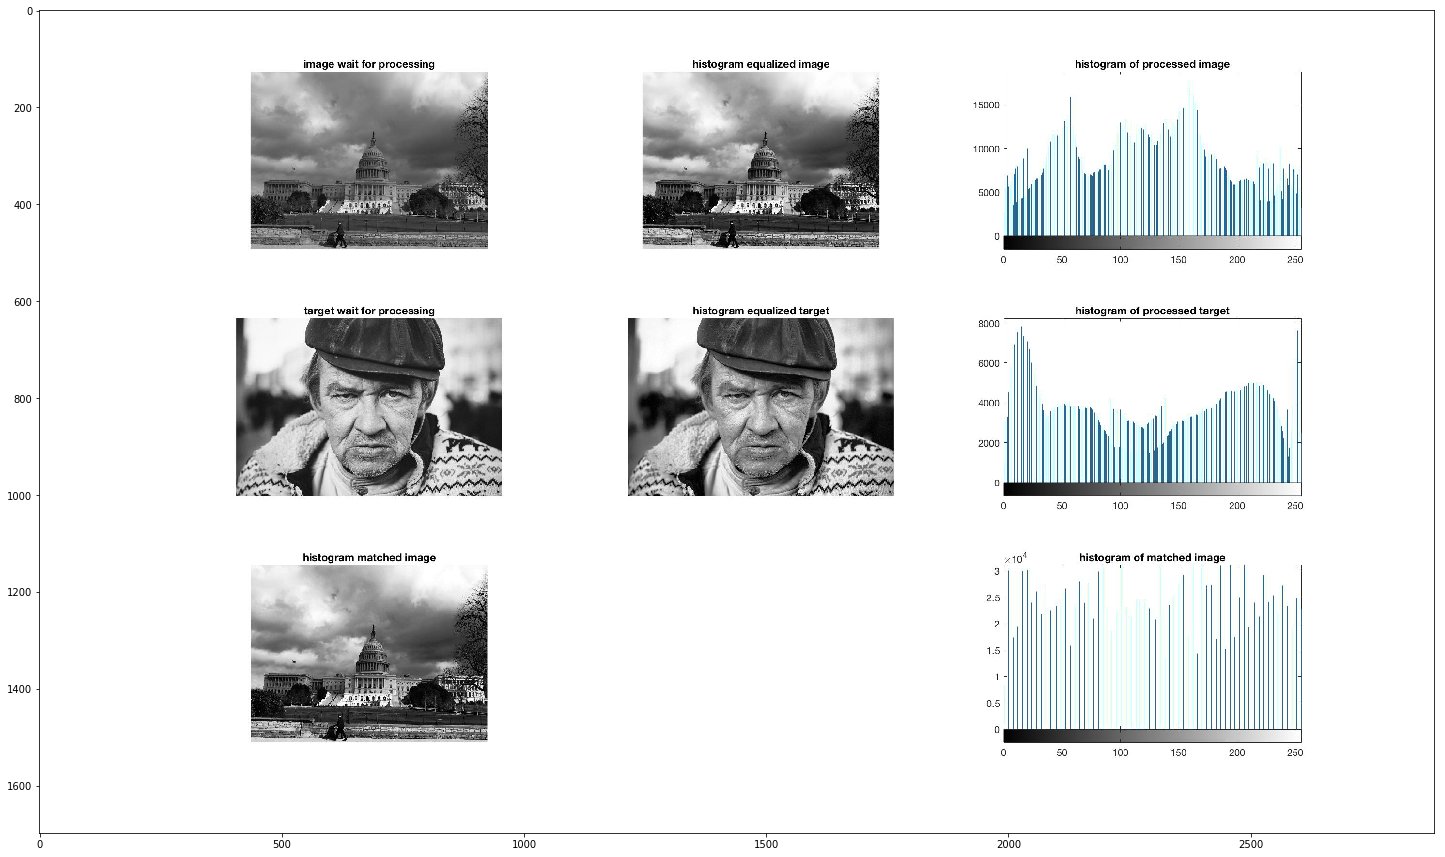

In [9]:
plot4 = cv2.imread('./Plot/plot4_dark3.jpg')
plt.figure(figsize=(25,16))
plt.subplot(111),plt.imshow(BGR2RGB(plot4))

#### Part 1  
As we can see, the dark image become more light and clear after doing histogram equalization. Conversely, the bright image become more clear and show more objects after doing histogram equalization.  
For circuit.tif, the histograms of image after doing histogram equalization and histogram matching are very equalized.  
For forest.tif, the histogram of it after doing histogram matching is very equalized for pixel value less than 100.  
For self-taking dark and bright images, the histograms of image after doing histogram equalization and histogram matching are very equalized.

#### Part 2  
The above results prove that Histogram Equalization and Histogram Matching work well on grayscale image. However, in the 21th century, we only take color picture, most of us are reluctant to convert it to grayscale one and willing to process it directly. Actually, Histogram Equalization and Histogram Matching work for color image as well.

If we code by ourself step by step, we can separate the waiting-prepared color image or reference image as 3 layers, R, G, B, and do histogram equalization one by one. If we stop here and stack 3 layers up, we can get the equalized color image. Else, we can choose to continue on doing histogram matching too. On this condition, we stack 3 layers up after histogram matching and get the finally enhanced color image.

If we implement the current Matlab function, imhistmatch(), to do image processing. We can refer the following instructions.

* If both waiting-prepared image and reference image are truecolor RGB images, then imhistmatch matches each color channel of waiting-prepared image independently to the corresponding color channel of reference image.
* If waiting-prepared image is a truecolor RGB image and reference image is a grayscale image, then imhistmatch matches each channel of waiting-prepared image against the single histogram derived from reference image.
* If waiting-prepared image is a grayscale image, then reference image must also be a grayscale image.

# Appendix
## Input Image and Basic Process

In [ ]:
% Basic preparion
function [IM,M,N,Bit,L] = image_info(insert_image,tell)
% deal with gray scale image
if tell=="gray"    
    IM=imread(insert_image);
    % convert image to float64 style
    IM=im2double(IM);
    [M,N] = size(IM);
    % get the bit value of image
    IM_in = imfinfo(insert_image);
    Bit=IM_in.BitDepth;
    L=2^Bit;
    
% deal with color image
elseif tell=="color"
    self = imread(insert_image);
    % convert image to gray scale
    IM = rgb2gray(self);
    % convert image to float64 style
    IM=im2double(IM);
    [M,N] = size(IM);
    % get the bit value of image
    IM_in = imfinfo(insert_image);
    Bit=IM_in.BitDepth;
    L=2^(Bit/3);
    
end
end

## Get Probability for Each Pixel Value 

In [ ]:
% Calculate probability of each appearing intensity value r_k
function [hi,pr,s_zero] = probability(IM,M,N)
[counts,inten_value] = imhist(IM);
count=counts/(M*N);    
pr = horzcat(inten_value,count);
hi = horzcat(inten_value,counts);
y = zeros(256,1);
s_zero = horzcat(inten_value,y);
end

## Get Cumulative Density Function and Equalized Value 

In [ ]:
% Calculate cumulative probability for each pixel value
function sr = cumulative(pr, s_zero, L)
for i = 1:L
    for j = 1:i
        s_zero(i,2) = s_zero(i,2) + pr(j,2);
    end
end
sr=s_zero;
sr(:,2)=(sr(:,2)*(L-1));
end

## Histogram Equalization 

In [ ]:
% Start Histogram Equalization
function IM_Hist_Eq = Hist_Eq(IM,sr,M,N)
IM_Hist_E = zeros(M,N);
    for i = 1:M
        for j = 1:N  
            % Limit the pixel value within [0,255]
            if sr(sr(:,1)==IM(i,j),2)<0
                IM_Hist_E(i,j)=0;                
            elseif sr(sr(:,1)==IM(i,j),2)>255
                IM_Hist_E(i,j)=255;               
            else IM_Hist_E(i,j)=sr(sr(:,1)==IM(i,j),2);
            end
        end
    end
% Convert float64 to uint8
IM_Hist_Eq = im2uint8(IM_Hist_E/255);
end

## Plot Function 

In [ ]:
% Start Plot Result and Histogram 
function Plott = Plot(IM, TAR, IM_Hist_Eq, TA_Hist_Eq, IM_Hist_Mat,k)
Plott=1;
figure(k);
% Plot source image and its histogram
subplot(3,3,1);imshow(IM);title('image wait for processing')
subplot(3,3,2);imshow(IM_Hist_Eq);title('histogram equalized image')
whos IM_Hist_Eq
subplot(3,3,3);imhist(IM_Hist_Eq);title('histogram of processed image')
% Plot target image and its histogram
subplot(3,3,4);imshow(TAR);title('target wait for processing')
subplot(3,3,5);imshow(TA_Hist_Eq);title('histogram equalized target')
whos TA_Hist_Eq
subplot(3,3,6);imhist(TA_Hist_Eq);title('histogram of processed target')
% Plot matched image and its histogram
subplot(3,3,7);imshow(IM_Hist_Mat);title('histogram matched image')
whos IM_Hist_Mat
subplot(3,3,9);imhist(IM_Hist_Mat);title('histogram of matched image')
end

## Process Circuit.tif 

In [ ]:
clc;
clear;
% processing first image
[IM,M,N,Bit,L] = image_info('circuit.tif','gray');
[TAR,m,n,bit,l] = image_info('test1.tif','gray');
[hi_IM,pr_IM,s_zero] = probability(IM,M,N);
[hi_TAR,pr_TAR,sr_zero] = probability(TAR,m,n);
sr_IM = cumulative(pr_IM, s_zero, L);
sr_TAR = cumulative(pr_TAR, sr_zero, l);
IM_Hist_Eq = Hist_Eq(IM,sr_IM,M,N);
TA_Hist_Eq = Hist_Eq(TAR,sr_TAR,m,n);
% Start Histogram Matching
IM_Hist_Mat = imhistmatch(IM_Hist_Eq, IM_Hist_Eq);

Plot(IM, TAR, IM_Hist_Eq, TA_Hist_Eq, IM_Hist_Mat,1)

## Process Forest.tif 

In [ ]:
clc;
clear;
% processing second image
[IM,M,N,Bit,L] = image_info('forest.tif','gray');
[TAR,m,n,bit,l] = image_info('test1.tif','gray');
[hi_IM,pr_IM,s_zero] = probability(IM,M,N);
[hi_TAR,pr_TAR,sr_zero] = probability(TAR,m,n);
sr_IM = cumulative(pr_IM, s_zero, L);
sr_TAR = cumulative(pr_TAR, sr_zero, l);
IM_Hist_Eq = Hist_Eq(IM,sr_IM,M,N);
TA_Hist_Eq = Hist_Eq(TAR,sr_TAR,m,n);
% Start Histogram Matching
IM_Hist_Mat = imhistmatch(IM_Hist_Eq, IM_Hist_Eq);

Plot(IM, TAR, IM_Hist_Eq, TA_Hist_Eq, IM_Hist_Mat,2)

## Process Self-taking Bright Image 

In [ ]:
clc;
clear;
% processing the first self taking image
[IM,M,N,Bit,L] = image_info('selfbright.jpg','color');
[TAR,m,n,bit,l] = image_info('test2.tif','color');
[hi_IM,pr_IM,s_zero] = probability(IM,M,N);
[hi_TAR,pr_TAR,sr_zero] = probability(TAR,m,n);
sr_IM = cumulative(pr_IM, s_zero, L);
sr_TAR = cumulative(pr_TAR, sr_zero, l);
IM_Hist_Eq = Hist_Eq(IM,sr_IM,M,N);
TA_Hist_Eq = Hist_Eq(TAR,sr_TAR,m,n);
% Start Histogram Matching
IM_Hist_Mat = imhistmatch(IM_Hist_Eq, TA_Hist_Eq);

Plot(IM, TAR, IM_Hist_Eq, TA_Hist_Eq, IM_Hist_Mat,3)

## Process Self-taking Dark Image 

In [ ]:
clc;
clear;
% processing the first self taking image
[IM,M,N,Bit,L] = image_info('selfdark.jpeg','color');
[TAR,m,n,bit,l] = image_info('test2.tif','color');
[hi_IM,pr_IM,s_zero] = probability(IM,M,N);
[hi_TAR,pr_TAR,sr_zero] = probability(TAR,m,n);
sr_IM = cumulative(pr_IM, s_zero, L);
sr_TAR = cumulative(pr_TAR, sr_zero, l);
IM_Hist_Eq = Hist_Eq(IM,sr_IM,M,N);
TA_Hist_Eq = Hist_Eq(TAR,sr_TAR,m,n);
% Start Histogram Matching
IM_Hist_Mat = imhistmatch(IM_Hist_Eq, TA_Hist_Eq);

Plot(IM, TAR, IM_Hist_Eq, TA_Hist_Eq, IM_Hist_Mat,4)